In [53]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np
import math

###1.작업

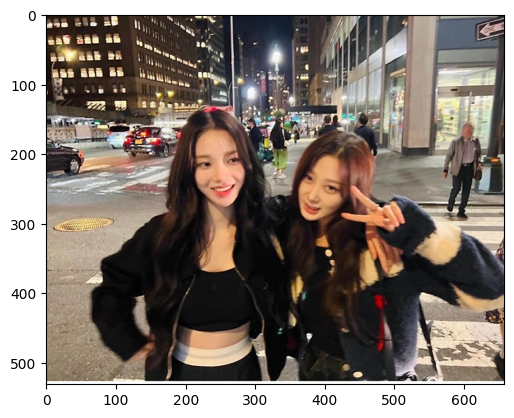

In [105]:
my_image='karina4.png'
img_bgr=cv2.imread(my_image)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_show=img_rgb.copy()
plt.imshow(img_rgb)
plt.show()

In [106]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)

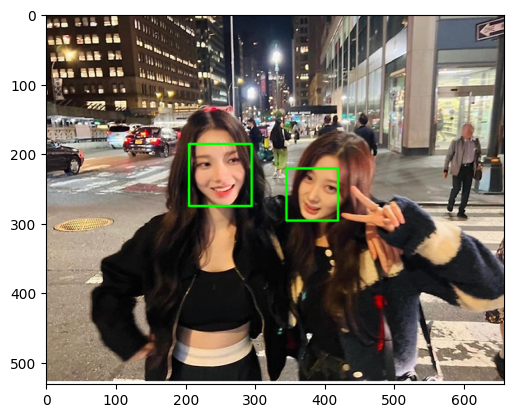

In [107]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.show()

In [16]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2025-04-10 06:05:54--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-04-10 06:05:55--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  33.4MB/s    in 1.8s    

2025-04-10 06:05:57 (33.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [18]:
os.getcwd()

'/content'

In [19]:
!mkdir -p /content/model

In [20]:
!mv shape_predictor_68_face_landmarks.dat.bz2 /content/model

In [21]:
!bzip2 -d ./model/shape_predictor_68_face_landmarks.dat.bz2

In [22]:
model_path= './model/shape_predictor_68_face_landmarks.dat'
landmark_predictor =dlib.shape_predictor(model_path)

In [23]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

In [25]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

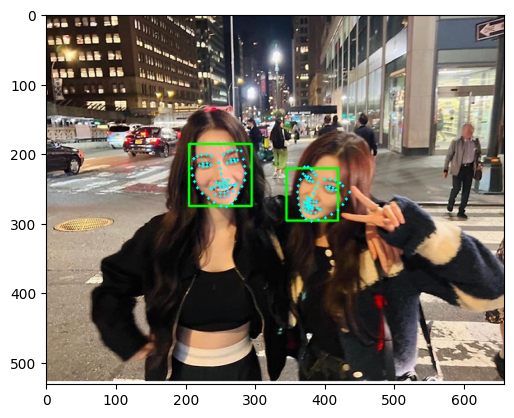

In [26]:
plt.imshow(img_show)
plt.show()

In [33]:
sticker=cv2.imread('cat-whiskers.png',cv2.IMREAD_UNCHANGED)

In [36]:
sticker.shape

(512, 512, 4)

1. 27,28,29 데이터를 통해 각도를 뽑고, 이미지 회전
2. 코 끝에 sticker의 코 끝이 위치하도록 알고리즘
3. 적절한 resize

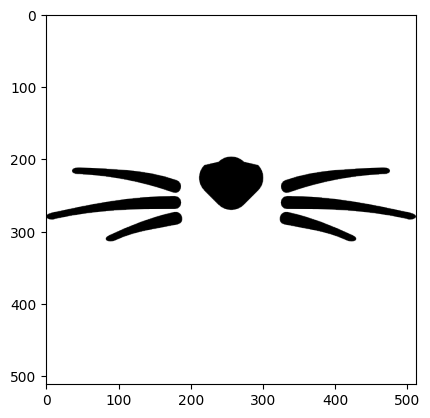

In [37]:
plt.imshow(sticker)
plt.show()

In [48]:
sticker_test=sticker.copy()

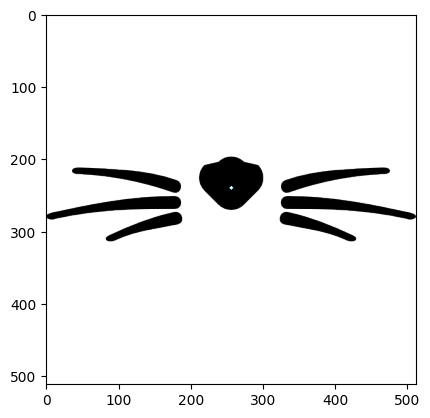

In [49]:
cv2.circle(sticker_test, (256,240), 2, (0, 255, 255), -1)
plt.imshow(sticker_test)
plt.show()

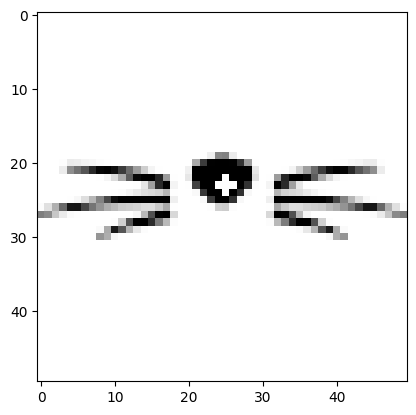

In [76]:
sticker_test_resize=cv2.resize(sticker_test,(w,h),interpolation=cv2.INTER_AREA)
cv2.circle(sticker_test_resize,(round(256*w/512),round(240*h/512)),1,(0,255,255),-1)

plt.imshow(sticker_test_resize)

plt.show()

In [52]:
xs=[]
ys=[]
for i in [27,29]:
 xs.append(list_landmarks[0][i][0])
 ys.append(list_landmarks[0][i][1])

slope=(ys[0]-ys[1])/(xs[0]-xs[1])
print(slope)

5.333333333333333


In [58]:
angle_rad = math.atan2(ys[1] - ys[0], xs[1] - xs[0])  # 라디안 단위의 각도
angle_deg = math.degrees(math.atan2(ys[1] - ys[0], xs[1] - xs[0]))

In [59]:
angle_deg

79.38034472384487

In [63]:
def rotate_image(image, angle, center=None):
    (h, w) = image.shape[:2]
    center=(256,240)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

In [64]:
plt.imshow(rotate_image(sticker_test,90-angle_deg))
plt.show()

In [67]:
width_ratio=2/3
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = round(dlib_rect.width()*width_ratio)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(253, 237)
(x,y) : (253,237)
(w,h) : (61,61)
(380, 264)
(x,y) : (380,264)
(w,h) : (50,50)


In [78]:
sticker_resize=cv2.resize(sticker,(w,h),interpolation=cv2.INTER_AREA)

In [82]:
center_a=round(256*w/512)
center_b=round(240*h/512)

In [83]:
refined_x = x - center_a
refined_y = y - center_b

In [81]:
if refined_x < 0:
    img_sticker = sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

240.5625

In [84]:
sticker_resize.shape

(50, 50, 4)

In [85]:
sticker_area = img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]

In [89]:
sticker_rgb = sticker_resize[:, :, :3]
alpha_mask = sticker_resize[:, :, 3] / 255.0  # 0~1로 정규화
alpha_mask = np.dstack((alpha_mask, alpha_mask, alpha_mask))

In [90]:
sticker_area = (alpha_mask * sticker_rgb + (1 - alpha_mask) *sticker_area)

In [92]:
img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]] = sticker_area

In [103]:
sticker_rgb = sticker_resize[:, :, :3]

# ROI: 원본 이미지에서 스티커가 들어갈 부분
roi =img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]

# blending 비율 설정
alpha = 0.1  # 스티커 비중
beta = 1 # 원본 이미지 비중

# 이미지 혼합
blended = cv2.addWeighted(sticker_rgb, alpha, roi, beta, gamma=0)

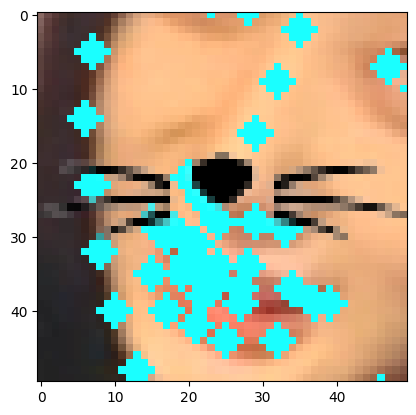

In [104]:
plt.imshow(blended)
plt.show()

###2.정리

In [177]:
my_image='karina3.png'
img_bgr=cv2.imread(my_image)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_show=img_rgb.copy()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

In [178]:
dlib_rects

rectangles[]

In [109]:
sticker=cv2.imread('cat-whiskers.png',cv2.IMREAD_UNCHANGED)

In [119]:
def angle(list_landmarks):
  xs=[]
  ys=[]
  for i in [27,29]:
    xs.append(list_landmarks[i][0])
    ys.append(list_landmarks[i][1])

  return math.degrees(math.atan2(ys[1] - ys[0], xs[1] - xs[0]))

In [121]:
def rotate_image(image, angle, center=None):
    (h, w) = image.shape[:2]
    center=(256,240)

    M = cv2.getRotationMatrix2D(center, 90-angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

In [122]:
angle_list=[]
for i in list_landmarks:
  angle_list.append(angle(i))

In [124]:
width_ratio=3/4
coord_x=[]
coord_y=[]
coord=[]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    coord_x.append(landmark[30][0])
    coord_y.append(landmark[30][1])
    w = h = round(dlib_rect.width()*width_ratio)
    coord.append(w)

In [146]:
img_show=img_rgb

In [147]:
for i in range(len(coord)):
  w=coord[i]
  h=coord[i]
  sticker_resize=cv2.resize(rotate_image(sticker,angle_list[i]),(w,h),interpolation=cv2.INTER_AREA)
  center_a=round(256*w/512)
  center_b=round(240*h/512)

  x=coord_x[i]
  y=coord_y[i]

  refined_x = x - center_a
  refined_y = y - center_b

  if refined_x < 0:
    sticker_resize = sticker_resize[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    sticker_resize = sticker_resize[-refined_y:, :]
    refined_y = 0

  sticker_area = img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]

  sticker_rgb = sticker_resize[:, :, :3]

  # alpha=0.5
  # beta = 1-alpha
  # blended=cv2.addWeighted(sticker_rgb,alpha,sticker_area,beta,gamma=0)

  desired_opacity = 0.7  # 1이면 원래 PNG 그대로, 0.5면 더 투명해짐

  alpha_mask = sticker_resize[:, :, 3] / 255.0  # 0~1로 정규화
  alpha_mask *= desired_opacity
  alpha_mask = np.dstack((alpha_mask, alpha_mask, alpha_mask))

  blended = (alpha_mask * sticker_rgb + (1 - alpha_mask) *sticker_area)

  img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]=blended

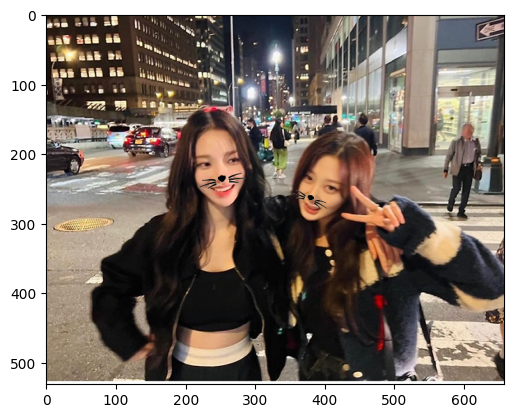

In [148]:
plt.imshow(img_show)
plt.show()

###3.보고서

가장 큰 문제점은 front에서 box detection이 이루어지기 때문에 각도가 바뀐 사진은 얼굴을 잘 인식하지 못해서 불가능하다.

멀리서 촬영했을 경우 얼굴인식을 원할히 하기 위해 피라미드 옵션을 적용하면 도움이 된다.

정면을 바라보고 있다면 width, height 차원에서의 각도 문제는 해결하였다.

이미지 밝기 등 다양한 옵션은 결국 우리가 사용한 얼굴인식 모델과 keypoint 인식 모델이 제대로 작동할 수 있는 조건이냐에 달려있다.

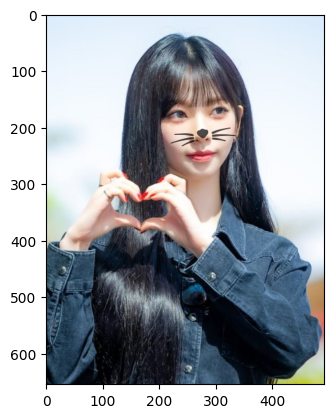

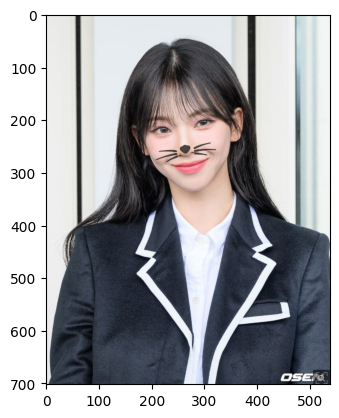

image.png

다음과 같이 3번 사진은 스티커 적용이 되지 않는데 이는 명확한 정면이 아니기도 하지만 손이라는 장애물이 정상적인 얼굴인식에 방해가 된다. HOG로 주변픽셀과의 변화를 통해 경계선을 도출하고 SVM을 적용하는데 손은 그런점에서 SVM에서 클래스 분할 지점을 판단하는데 매우 방해가 된다.

마찬가지로 스티커의 각도를 조절하지만 사진상 원근감에 따른 깊이 방향으로의 얼굴 이동은 고려하지않았고 그 축으로의 회전은 고려하지않았다.

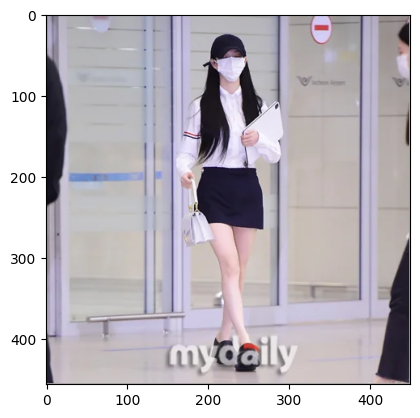

마스크도 얼굴인식이 되지 않는다. 위의 HOG 논리와 동일하다

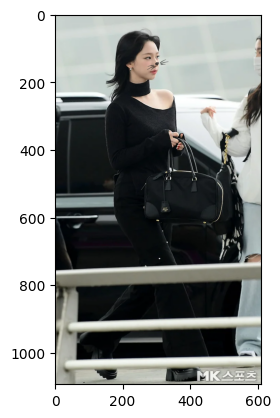

거리가 있는 얼굴도 인식이 가능하고, 자세한 얼굴인식 최소크기는 테스트해봐야한다. 측면사진도 얼굴인식이 되었지만 스티커는 사진깊이 방향의 회전은 고려하지 않았기 때문에 스티커는 항상 x,y 축에 위치한다.

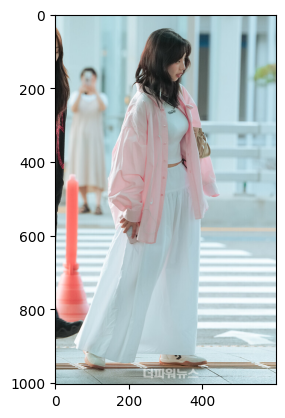

이정도의 회전은 인식하지 못한다. 마스크 사진과 위 사진에서 동일하게 얼굴인식을 하지 못했고 얼굴 인식만 되서 넘겨주면 key point detection은 비교적 더 넓은 유연함을 가지고 작동하는 것으로 보인다.

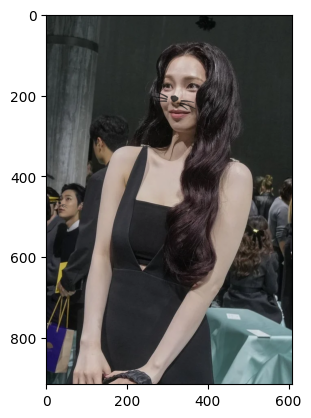

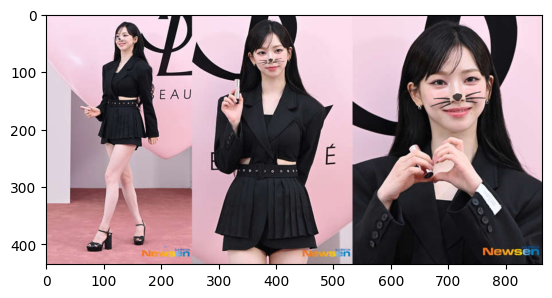

원근 문제에서는 비교적 자유로운것으로 보인다.

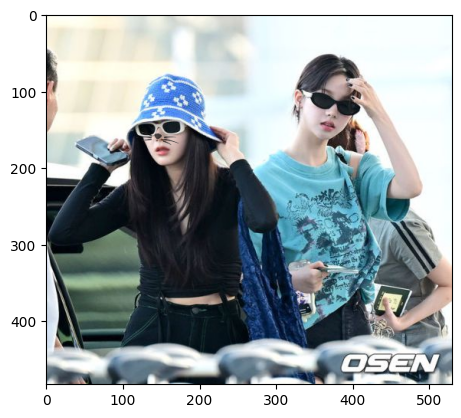

위 사진으로 얼굴인식 모델을 판단할 수 없지만 역시 얼굴 근처에 다른 물체가 있는 경우 얼굴인식 성능이 크게 떨어지는 것 같다. 카리나의 목 뒤로 사람이 있다. 이는 얼굴 패턴을 인식하는데 2D상으로 볼때는 겹치는 픽셀변화를 보이고 방해가 될 확률이 높다.

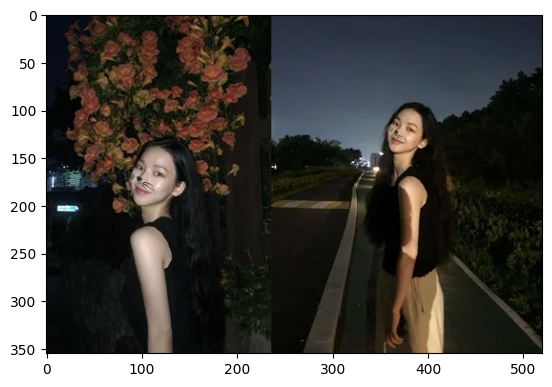

조명이 있긴 하지만 어두운 사진도 잘 인식한다. 사람 눈도 형체만 볼 수 있을 정도의 어두운 환경에서는 픽셀변화가 적어지고 HOG를 통한 얼굴인식이 잘 작동하지 않기 때문에 힘들다.

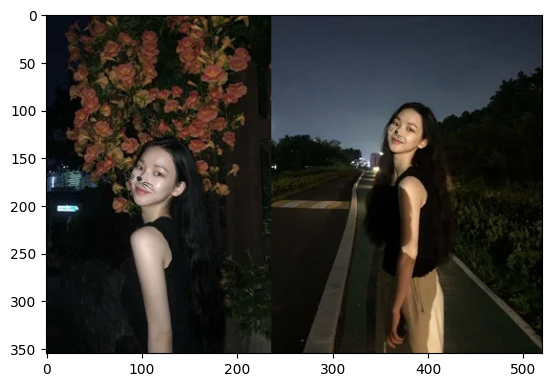

In [179]:
my_image='karina11.webp'
img_bgr=cv2.imread(my_image,cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_show=img_rgb.copy()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects=detector_hog(img_rgb,1)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

sticker=cv2.imread('cat-whiskers.png',cv2.IMREAD_UNCHANGED)

angle_list=[]
for i in list_landmarks:
  angle_list.append(angle(i))

width_ratio=3/4
coord_x=[]
coord_y=[]
coord=[]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    coord_x.append(landmark[30][0])
    coord_y.append(landmark[30][1])
    w = h = round(dlib_rect.width()*width_ratio)
    coord.append(w)

for i in range(len(coord)):
  w=coord[i]
  h=coord[i]
  sticker_resize=cv2.resize(rotate_image(sticker,angle_list[i]),(w,h),interpolation=cv2.INTER_AREA)
  center_a=round(256*w/512)
  center_b=round(240*h/512)

  x=coord_x[i]
  y=coord_y[i]

  refined_x = x - center_a
  refined_y = y - center_b

  if refined_x < 0:
    sticker_resize = sticker_resize[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    sticker_resize = sticker_resize[-refined_y:, :]
    refined_y = 0

  sticker_area = img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]

  sticker_rgb = sticker_resize[:, :, :3]

  # alpha=0.5
  # beta = 1-alpha
  # blended=cv2.addWeighted(sticker_rgb,alpha,sticker_area,beta,gamma=0)

  desired_opacity = 0.7  # 1이면 원래 PNG 그대로, 0.5면 더 투명해짐

  alpha_mask = sticker_resize[:, :, 3] / 255.0  # 0~1로 정규화
  alpha_mask *= desired_opacity
  alpha_mask = np.dstack((alpha_mask, alpha_mask, alpha_mask))

  blended = (alpha_mask * sticker_rgb + (1 - alpha_mask) *sticker_area)

  img_show[refined_y:refined_y+sticker_resize.shape[0], refined_x:refined_x+sticker_resize.shape[1]]=blended

plt.imshow(img_show)
plt.show()

###4.hog

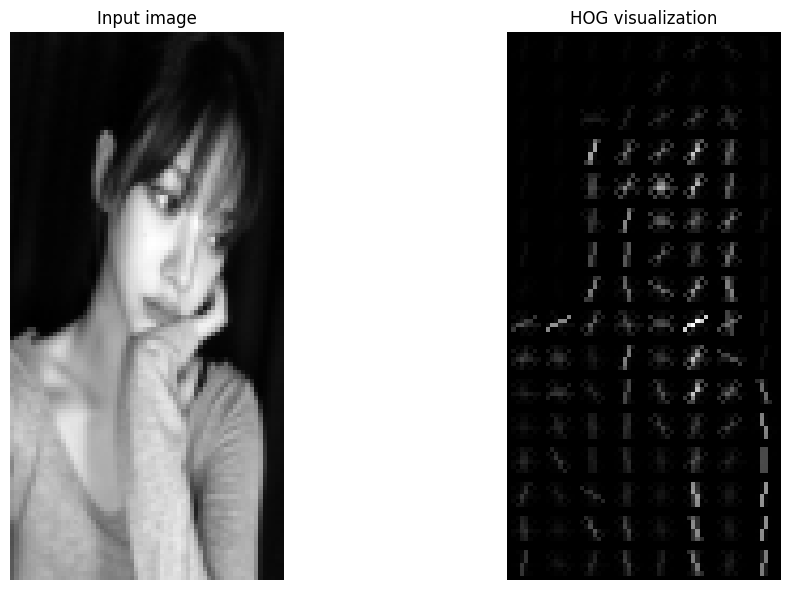

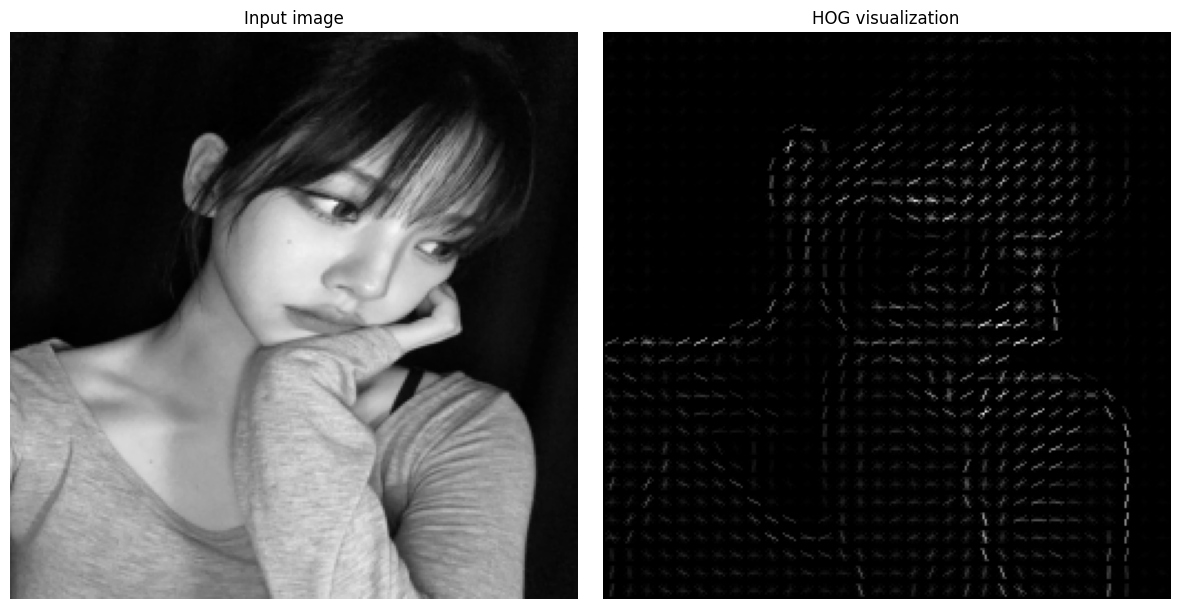

손 부분이 얼굴과 합쳐져서 명확히 얼굴형상을 만드는것을 방해한다.

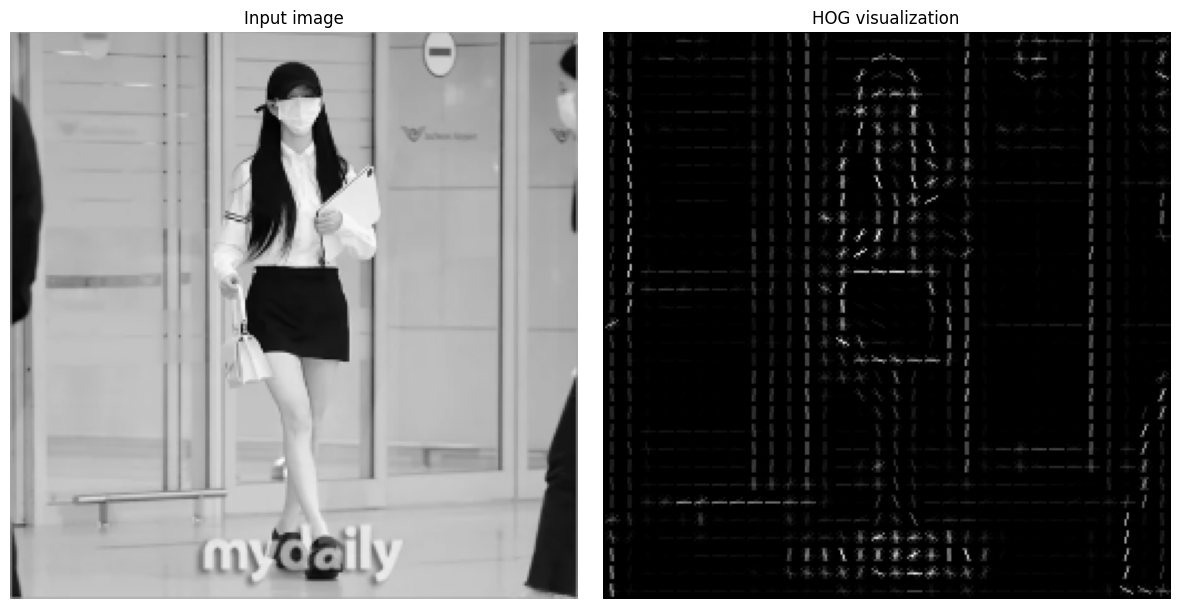

턱부분에서 유의미한 경계선이 발생하지 않는 것을 확인할 수 있다.

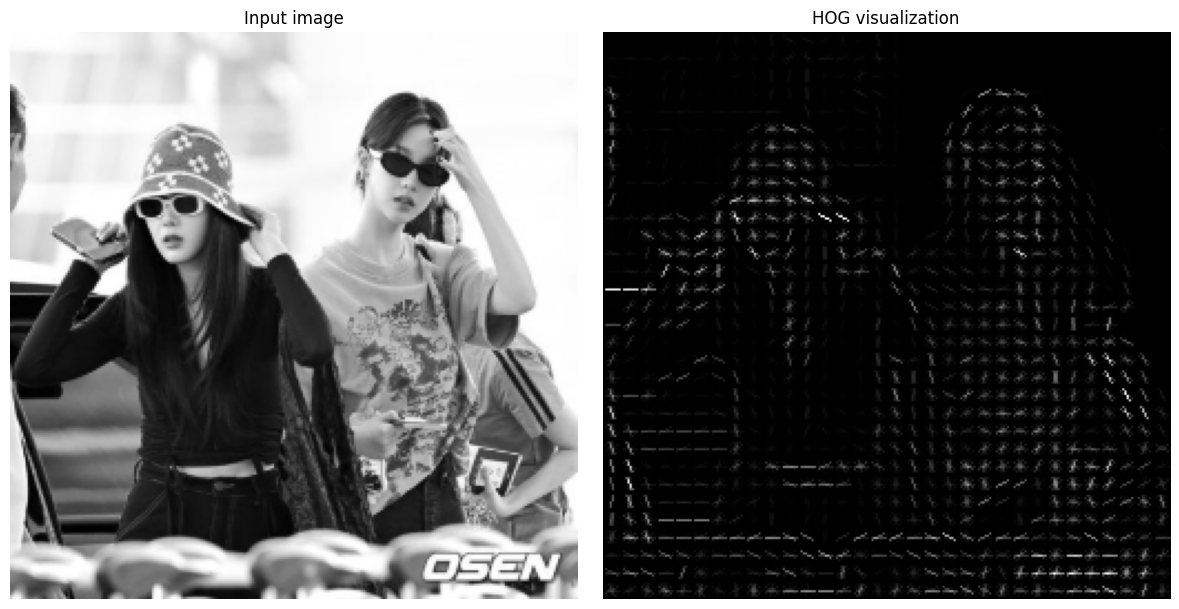

추측이지만 왼쪽 지젤은 턱선 부근이 잘 형성되었는데 카리나는 턱선 부근이 잘 형성되지 않음을 확인할 수 있다.

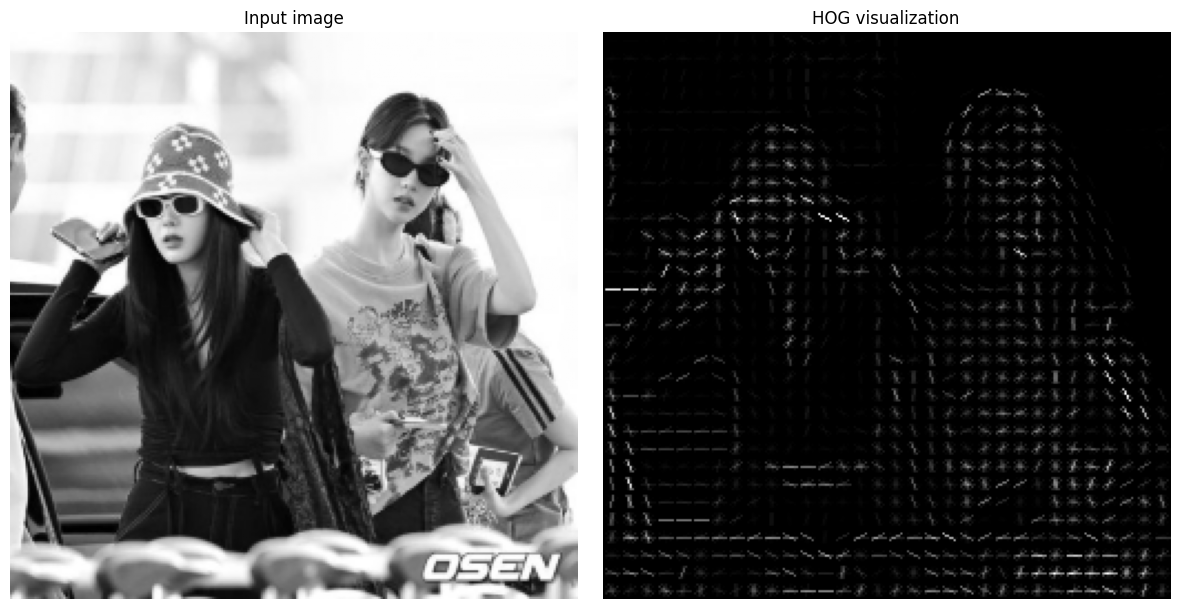

In [190]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color, io
from skimage.transform import resize

# 이미지 불러오기
img = cv2.imread('karina10.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = color.rgb2gray(resize(img,(256,256)))  # HOG는 128x64에 잘 맞음
#resize(img, (128, 64))
# HOG 계산 + 시각화용 이미지도 함께
features, hog_image = hog(img_gray,
                          orientations=9,
                          pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2),
                          visualize=True,
                          block_norm='L2-Hys')

# 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.axis('off')

ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG visualization')
ax2.axis('off')

plt.show()